In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dist = np.genfromtxt('data/mjd_dist_alt.csv', delimiter=',')

In [3]:
mjd = dist[0:1]
bgd = dist[1:2]
alt = dist[2:3]


In [4]:
bgd_adj = []
for i in range(len(bgd[0])):
    if alt[0][i] >= 0:
        bgd_adj.append(bgd[0][i])
    else:
        bgd_adj.append(0)


Text(0, 0.5, 'BGD distance (km)')

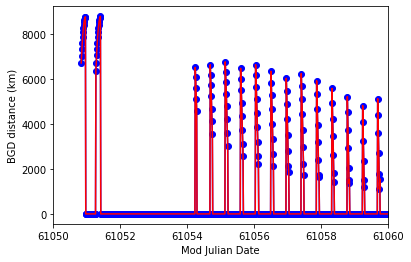

In [5]:
plt.plot(mjd[0],bgd_adj,'bo-')
plt.plot(mjd[0],bgd_adj,'r-')
plt.xlim(61050,61060)
plt.xlabel('Mod Julian Date')
plt.ylabel('BGD distance (km)')

In [6]:
# derivatives
d_bgd = np.diff(bgd_adj)
d_mjd = np.diff(mjd[0])
vel = d_bgd / (d_mjd * 3600 * 24)

mid_time = (mjd[0][1:] + mjd[0][:-1]) / 2
time = (mid_time - mid_time[0]) * 3600 * 24


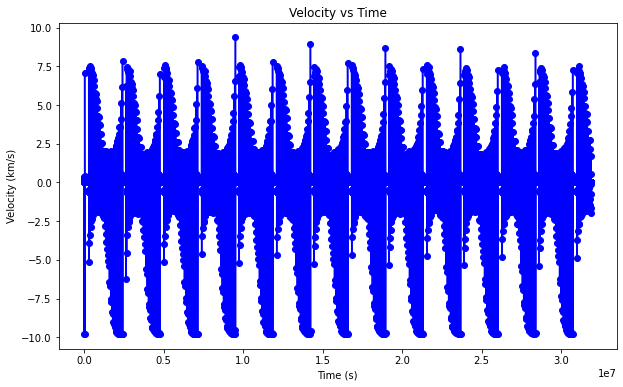

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(time, vel, marker='o', linestyle='-', color='b')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (km/s)')
# plt.xlim(61051,61052)
plt.show()

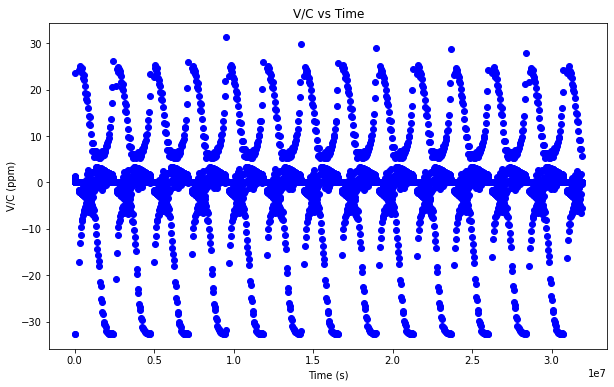

In [8]:
# doppler
c_kms = 3e5 # speed of light
v_c = vel/c_kms * 1e6

plt.figure(figsize=(10, 6))
plt.plot(time, v_c,'bo')
plt.title('V/C vs Time')
plt.xlabel('Time (s)')
plt.ylabel('V/C (ppm)')
# plt.xlim(61051,61052)
plt.show()

In [9]:
# doppler derivatives
d_dop = np.diff(v_c)
d_time = np.diff(time)
acc = d_dop / d_time

print(acc.max())

0.036243339286591014


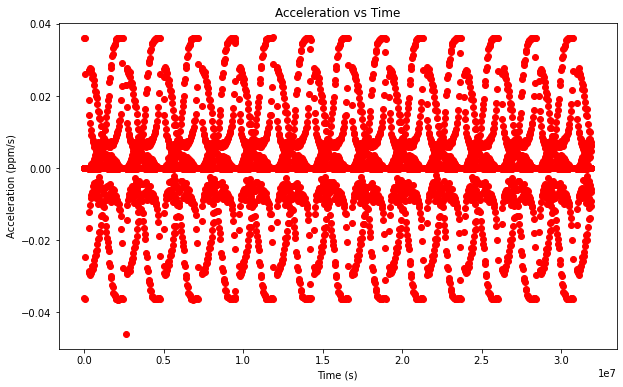

In [10]:
time_acc = (time[1:] + time[:-1]) / 2

plt.figure(figsize=(10, 6))
plt.plot(time_acc, acc,'ro')
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (ppm/s)')
# plt.xlim(61051,61052)
plt.show()

Text(0.5, 0, 'V/c (ppm) - 0s removed')

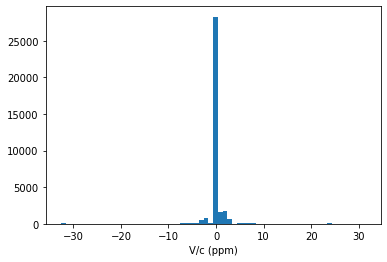

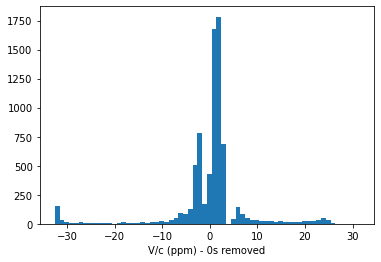

In [11]:
plt.figure()
plt.hist(v_c, bins=np.arange(v_c.min(), v_c.max() + 1, 1))
plt.xlabel('V/c (ppm)')

plt.figure()
plt.hist(v_c[v_c != 0], bins=np.arange(v_c.min(), v_c.max() + 1, 1))
plt.xlabel('V/c (ppm) - 0s removed')


Text(0.5, 0, 'Acceleration - 0s removed (ppm/s)')

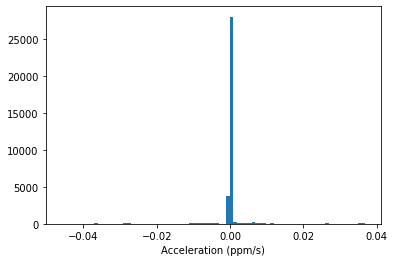

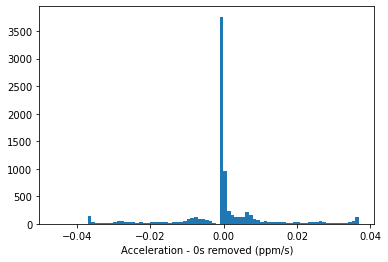

In [12]:
plt.figure()
plt.hist(acc, bins=np.arange(acc.min(), acc.max() + 0.001, 0.001))
plt.xlabel('Acceleration (ppm/s)')

plt.figure()
plt.hist(acc[acc != 0], bins=np.arange(acc.min(), acc.max() + 0.001, 0.001))
plt.xlabel('Acceleration - 0s removed (ppm/s)')


In [13]:
# make adjustments:

data = np.genfromtxt("data/240611/25mhz_240611_153549.csv", delimiter=',')[:,4]
wave_f = np.fft.rfft(data)
    
def drifted_signal(clock_drift=0, nx=500):
    signal_drift = np.zeros(Ns * nx, dtype=complex)
    phi_shift = np.arange(Ns * nx) * 2 * np.pi / Ns

    for f, coef in enumerate(wave_f):
        # add to drifted_wave the component at frequency f
        signal_drift += 2 * coef * np.exp(1j * phi_shift * f * (1 + clock_drift)) / Ns
    signal_drift = np.real(signal_drift)
    return signal_drift


In [14]:
def drift_correction(dop,acc):
    for i in range(len(dop)):
        if dop[i] > 0.3:
            if acc[i] > 0:
                drift = -(dop[i] + 0.3)
            elif acc[i] < 0:
                drift = -(dop[i] - 0.3)
            else:
                drift = -dop[i]
#             signal = drifted_signal(drift, 4)

        elif dop[i] < -0.3:
            if acc[i] > 0:
                drift = -(dop[i] + 0.3)
            elif acc[i] < 0:
                drift = -(dop[i] - 0.3)
            else:
                drift = -dop[i]
#             signal = drifted_signal(drift, 4)

        else:
            drift = 0

        dop[i:] += drift

    return dop


In [15]:
Ns = len(data)
new_vc = drift_correction(v_c,acc)
print(new_vc.max())

0.3000000000000007
